# INTRA BAR FEATURES

📚 Join our community: https://www.quantreo.com

(**Current project: Create a profitable trading strategy with me and the community members**)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ta
import seaborn as sns
sns.set_style("whitegrid")

In [2]:
df = pd.read_parquet("1M_EURUSD.parquet")
df

,Unnamed: 0,open,high,low,close,tick_volume,spread,real_volume
time,,,,,,,,
2020-01-02 03:00:00,1849364,1.12182,1.12183,1.12180,1.12182,12,5,0
2020-01-02 03:01:00,1849365,1.12182,1.12202,1.12182,1.12198,25,5,0
2020-01-02 03:02:00,1849366,1.12198,1.12204,1.12198,1.12204,18,5,0
2020-01-02 03:03:00,1849367,1.12204,1.12204,1.12201,1.12201,5,5,0
2020-01-02 03:04:00,1849368,1.12203,1.12214,1.12203,1.12214,15,5,0
...,...,...,...,...,...,...,...,...
2024-06-28 23:54:00,3519476,1.07124,1.07131,1.07121,1.07121,37,12,0
2024-06-28 23:55:00,3519477,1.07123,1.07129,1.07123,1.07125,27,12,0
2024-06-28 23:56:00,3519478,1.07125,1.07138,1.07125,1.07132,76,12,0


### HURST EXPONENT

- Around 0.5 --> Random Walk
- Close to 0.4 or below --> Ranging
- Cloe to 0.6 or above --> Trending

In [3]:
import pandas as pd
import numpy as np
from hurst import compute_Hc

# Function to calculate the Hurst exponent of a time series
def hurst_exponent(series):
    try:
        H, c, data = compute_Hc(series, kind='price')
    except:
        H = np.nan
    return H


# Aggregate data into 4-hour intervals and add additional columns
data_4h = df.resample('4h').agg({
    'open': 'first',                  # First open price in the 4-hour interval
    'high': 'max',                    # Highest price in the 4-hour interval
    'low': 'min',                     # Lowest price in the 4-hour interval
    'close': 'last',                  # Last close price in the 4-hour interval
    'tick_volume': 'sum',             # Total tick volume in the 4-hour interval
})

# Calculate the Hurst exponent for each 4-hour interval
data_4h['hurst'] = df.resample('4h')['close'].apply(hurst_exponent)

# Reset the index if necessary
data_4h.reset_index(inplace=True)

# Display the aggregated data for verification
print(data_4h)

                    time     open     high      low    close  tick_volume  \
0    2020-01-02 00:00:00  1.12182  1.12244  1.12180  1.12209         1116   
1    2020-01-02 04:00:00  1.12208  1.12244  1.12008  1.12043         3430   
2    2020-01-02 08:00:00  1.12042  1.12138  1.12011  1.12028         7633   
3    2020-01-02 12:00:00  1.12028  1.12037  1.11828  1.11962         8975   
4    2020-01-02 16:00:00  1.11960  1.12028  1.11634  1.11697        14699   
...                  ...      ...      ...      ...      ...          ...   
9835 2024-06-28 04:00:00  1.06973  1.06985  1.06850  1.06863         4254   
9836 2024-06-28 08:00:00  1.06863  1.07037  1.06857  1.06975         6685   
9837 2024-06-28 12:00:00  1.06976  1.07189  1.06916  1.07044         9123   
9838 2024-06-28 16:00:00  1.07043  1.07218  1.06922  1.07156        15375   
9839 2024-06-28 20:00:00  1.07156  1.07244  1.07058  1.07121         4996   

         hurst  
0          NaN  
1     0.800940  
2     0.389531  
3     0

0.8009403748509211


<AxesSubplot:xlabel='time'>

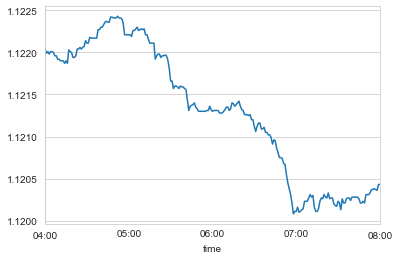

In [8]:
i = 1
print(data_4h.loc[i,"hurst"])
df.loc[data_4h.loc[i,"time"]:data_4h.loc[i+1,"time"]]["close"].plot()

<AxesSubplot:>

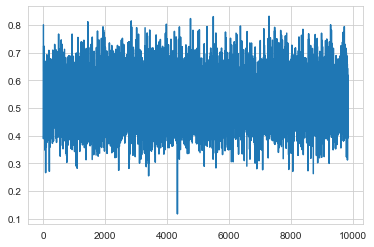

In [5]:
data_4h["hurst"].plot()

In [6]:
data_4h.head(15).dropna(thresh=data_4h.shape[1]-2)

,time,open,high,low,close,tick_volume,hurst
0,2020-01-02 00:00:00,1.12182,1.12244,1.12180,1.12209,1116,NaN
1,2020-01-02 04:00:00,1.12208,1.12244,1.12008,1.12043,3430,0.800940
2,2020-01-02 08:00:00,1.12042,1.12138,1.12011,1.12028,7633,0.389531
3,2020-01-02 12:00:00,1.12028,1.12037,1.11828,1.11962,8975,0.536219
4,2020-01-02 16:00:00,1.11960,1.12028,1.11634,1.11697,14699,0.578861
5,2020-01-02 20:00:00,1.11697,1.11733,1.11635,1.11723,5570,0.401566
6,2020-01-03 00:00:00,1.11709,1.11783,1.11680,1.11733,2902,0.551425
7,2020-01-03 04:00:00,1.11733,1.11773,1.11643,1.11662,5783,0.554931
8,2020-01-03 08:00:00,1.11662,1.11714,1.11399,1.11400,10596,0.599449
9,2020-01-03 12:00:00,1.11400,1.11486,1.11248,1.11381,10893,0.563681


In [7]:
data_4h.dropna(thresh=data_4h.shape[1]-2).reset_index(drop=True).to_parquet(f"4H_EURUSD.parquet",compression='gzip') 